<a href="https://colab.research.google.com/github/mschoettner/interpret-iqms/blob/main/ImageQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In order to read the files stored in Google Drive you have to authenticate
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = '/content/gdrive/My Drive/Colab Notebooks/'

Mounted at /content/gdrive


# Data loading and scaling

Load data and scores from the tsv file and scale the data values using min-max scaling

In [ ]:
import pandas as pd
import re

def get_score(df, value, score_type, is_binary=False):
  if score_type == 'score':
    s = df.loc[df['bids_name'] == value, 'score'].item()
    if is_binary:
      if s == 1:
        return s
      return 0
    return s

  patt = re.compile(r"acq-(.*?)_T1w")
  m = patt.search(value)
  if m:
    s = m.group(1)

    if is_binary:
      if 'headmotion' in s:
        return 0
      return 1
    return s  

  print("Unrecognized movement. returning UNK")
  if is_binary:
    return -1
  return 'UNK'

import pandas as pd
from sklearn import preprocessing


measurements = pd.read_csv(path + "/group_T1w.tsv", sep="\t")
cols = measurements.columns.tolist()
for x in ['bids_name', 'size_x', 'size_y', 'size_z', "spacing_x", "spacing_y", "spacing_z" ]:
  cols.remove(x)

scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.Normalizer()
d = scaler.fit_transform(measurements[cols])
measurements[cols] = pd.DataFrame(d, columns=cols)

scores_df = pd.read_csv(path + "/scores.tsv", sep="\t")
vectors = []
cols = measurements.columns.tolist()
cols.remove('bids_name')

for _, row in measurements.iterrows():
  vectors.append([row[cols][i] for i in range(len(row[cols]))])


A plotting function for scatter plots of TSNE/UMAP projections

In [ ]:
import matplotlib.pyplot as plt

def plot_vectors(projections, scores, title):

  score_types = set(scores)
  print("score types: {}".format(score_types))

  colours = {1: 'indianred', 2: 'gray', 3: 'black', 'standard': 'indianred', 'headmotion1': 'gray', 'headmotion2': 'black', 'UNK': 'blue', 0:'black'}
  proj_colours = [colours[s] for s in scores]
  
  plt.title(title)
  plt.scatter(projections[:,0], projections[:,1],color=proj_colours)

  plt.show()


# TSNE and UMAP plotting

Produces different types of scores -- using the {1,2,3} and {standard, hedamotion1,headmotion2} scoring, and binary versions of these (1 -- good or standard, 0 -- bad, or headmotion*)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


score types: {0, 1}


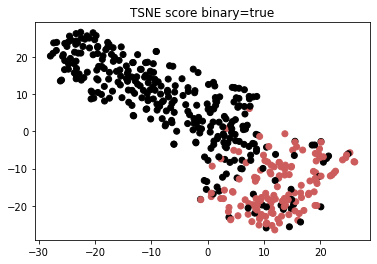

score types: {0, 1}


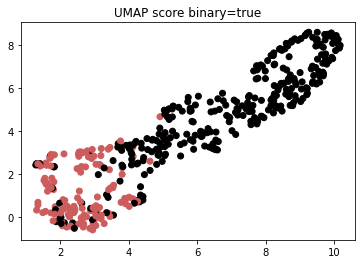

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


score types: {1, 2, 3}


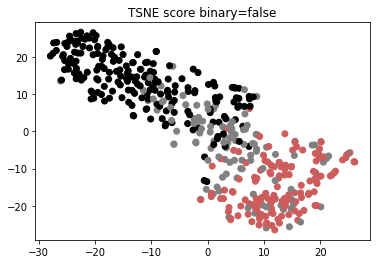

score types: {1, 2, 3}


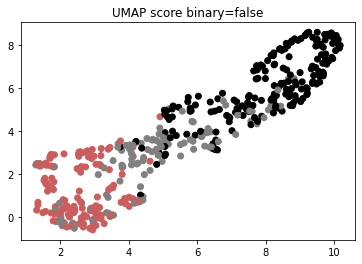

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


score types: {0, 1}


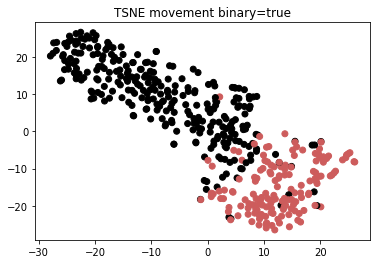

score types: {0, 1}


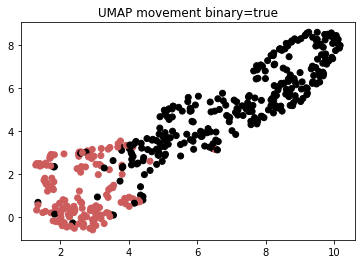

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


score types: {'standard', 'headmotion2', 'headmotion1'}


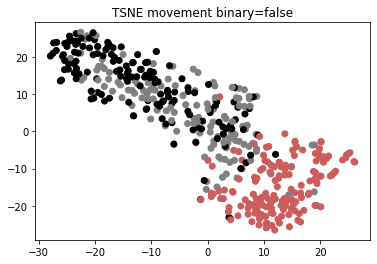

score types: {'standard', 'headmotion2', 'headmotion1'}


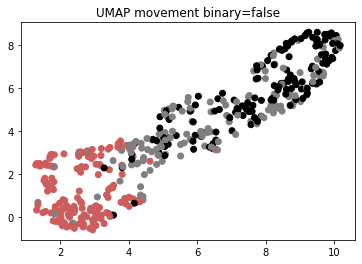

In [ ]:

def generate_scores(measurements, s_o, bin):
  scores = []
  for _, row in measurements.iterrows():
    scores.append(get_score(scores_df,row['bids_name'], s_o, bin))
  return scores


x = !pip list -v | grep umap-learn

if len(x) == 0:
  !pip install -U umap-learn

from sklearn.manifold import TSNE
from umap import UMAP

score_opt = ['score', 'movement']
binary = [True, False]

for s_o in score_opt:
  for bin in binary:
    scores = generate_scores(measurements, s_o, bin)

    is_bin = "false"
    if bin:
      is_bin = "true"

    tsne = TSNE(n_components=2, random_state=0)
    plot_vectors(tsne.fit_transform(vectors), scores, "TSNE " + s_o + " binary=" + is_bin)

    u_map = UMAP(n_components=2, init='random', random_state=0)
    plot_vectors(u_map.fit_transform(vectors), scores, "UMAP " + s_o + " binary=" + is_bin)

